In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor, as_completed


from Project.Database import Db

In [2]:
netzero1 = Db.load_data(hourly=False, year=1)
netzero1

,Timestamp,TimeStamp_Count,DHW_ClothesWasherColdFlow,DHW_ClothesWasherHotFlow,DHW_DishwasherHotFlow,DHW_HeatPumpWaterHeaterEnergyTotal,DHW_HeatPumpWaterHeaterPowerTotal,DHW_ManifoldColdFlow,DHW_ManifoldHotFlow,DHW_MixValveColdFlow,...,Vent_HRVTempReturnIn,Vent_HRVTempSupplyOut,Vent_HRVfreshairpressuredifferential,Vent_HRVstaleairpressuredifferential,HVAC_HeatPumpIndoorUnitPower,HVAC_HeatPumpOutdoorUnitPower,HVAC_DehumidifierAirflow,HVAC_DehumidifierExitAirTemp,HVAC_DehumidifierInletAirTemp,HVAC_DehumidifierPower
0,2013-07-01 00:01:14-04:00,1,0.0,0.0,0.00000,0.000000,6.920000,0.000000,0.00000,0.00000,...,22.552117,23.758415,NaN,NaN,125.4000,922.6568,NaN,NaN,NaN,NaN
1,2013-07-01 00:02:14-04:00,2,0.0,0.0,0.00000,0.132000,6.920000,0.000000,0.00000,0.00000,...,22.523656,23.737489,NaN,NaN,127.0400,919.2424,NaN,NaN,NaN,NaN
2,2013-07-01 00:03:14-04:00,3,0.0,0.0,0.00000,0.264000,6.920000,0.000000,0.00000,0.00000,...,22.539345,23.742217,NaN,NaN,153.3050,920.8184,NaN,NaN,NaN,NaN
3,2013-07-01 00:04:14-04:00,4,0.0,0.0,0.00000,0.396000,6.920000,0.000000,0.00000,0.00000,...,22.539554,23.727526,NaN,NaN,143.4575,922.3944,NaN,NaN,NaN,NaN
4,2013-07-01 00:05:14-04:00,5,0.0,0.0,0.00000,0.528000,6.920000,0.000000,0.00000,0.00000,...,22.506425,23.705258,NaN,NaN,141.8150,925.2832,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518787,2014-06-30 23:29:22-04:00,518788,0.0,0.0,1.86261,1074.687075,765.920563,11.297412,57.77676,8.69218,...,23.912489,24.423000,2.209914,2.503488,110.6250,1517.2800,NaN,NaN,NaN,NaN
518788,2014-06-30 23:30:22-04:00,518789,0.0,0.0,1.86261,1087.432650,766.929871,11.297412,57.77676,8.69218,...,23.898320,24.403229,2.195995,2.512385,124.5800,1394.6256,NaN,NaN,NaN,NaN
518789,2014-06-30 23:31:22-04:00,518790,0.0,0.0,1.86261,1100.200137,768.525940,11.297412,57.77676,8.69218,...,23.849174,24.392863,2.224423,2.554394,131.1450,1311.6304,NaN,NaN,NaN,NaN
518790,2014-06-30 23:59:22-04:00,518791,0.0,0.0,1.86261,1173.107485,6.920000,11.297412,57.77676,8.69218,...,24.119352,24.579783,2.239691,2.474923,127.0400,1325.5504,NaN,NaN,NaN,NaN


In [6]:
netzero2 = Db.load_data(hourly=False, year=2)

NameError: name 'Db' is not defined

In [8]:
netzero1_hourly = Db.load_data(hourly=True, year=1)

In [9]:
netzero2_hourly = Db.load_data(hourly=True, year=2)

In [4]:
netzero1["Timestamp"] = pd.to_datetime(netzero1["Timestamp"], format="%Y-%m-%d %H:%M:%S%z")

In [11]:
netzero1_hourly["Timestamp"] = pd.to_datetime(netzero1_hourly["Timestamp"], format="%Y-%m-%d %H:%M:%S%z")

In [5]:
netzero1.loc[:50]

,Timestamp,TimeStamp_Count,DHW_ClothesWasherColdFlow,DHW_ClothesWasherHotFlow,DHW_DishwasherHotFlow,DHW_HeatPumpWaterHeaterEnergyTotal,DHW_HeatPumpWaterHeaterPowerTotal,DHW_ManifoldColdFlow,DHW_ManifoldHotFlow,DHW_MixValveColdFlow,...,Vent_HRVTempReturnIn,Vent_HRVTempSupplyOut,Vent_HRVfreshairpressuredifferential,Vent_HRVstaleairpressuredifferential,HVAC_HeatPumpIndoorUnitPower,HVAC_HeatPumpOutdoorUnitPower,HVAC_DehumidifierAirflow,HVAC_DehumidifierExitAirTemp,HVAC_DehumidifierInletAirTemp,HVAC_DehumidifierPower
0,2013-07-01 00:01:14-04:00,1,0.0,0.0,0.0,0.000,6.92,0.0,0.0,0.0,...,22.552117,23.758415,NaN,NaN,125.4000,922.6568,NaN,NaN,NaN,NaN
1,2013-07-01 00:02:14-04:00,2,0.0,0.0,0.0,0.132,6.92,0.0,0.0,0.0,...,22.523656,23.737489,NaN,NaN,127.0400,919.2424,NaN,NaN,NaN,NaN
2,2013-07-01 00:03:14-04:00,3,0.0,0.0,0.0,0.264,6.92,0.0,0.0,0.0,...,22.539345,23.742217,NaN,NaN,153.3050,920.8184,NaN,NaN,NaN,NaN
3,2013-07-01 00:04:14-04:00,4,0.0,0.0,0.0,0.396,6.92,0.0,0.0,0.0,...,22.539554,23.727526,NaN,NaN,143.4575,922.3944,NaN,NaN,NaN,NaN
4,2013-07-01 00:05:14-04:00,5,0.0,0.0,0.0,0.528,6.92,0.0,0.0,0.0,...,22.506425,23.705258,NaN,NaN,141.8150,925.2832,NaN,NaN,NaN,NaN
5,2013-07-01 00:06:14-04:00,6,0.0,0.0,0.0,0.660,6.92,0.0,0.0,0.0,...,22.491386,23.715523,NaN,NaN,146.7400,932.9000,NaN,NaN,NaN,NaN
6,2013-07-01 00:07:14-04:00,7,0.0,0.0,0.0,0.792,6.92,0.0,0.0,0.0,...,22.526583,23.697305,NaN,NaN,145.9175,928.1728,NaN,NaN,NaN,NaN
7,2013-07-01 00:08:14-04:00,8,0.0,0.0,0.0,0.924,6.92,0.0,0.0,0.0,...,22.469212,23.691279,NaN,NaN,152.4850,950.4968,NaN,NaN,NaN,NaN
8,2013-07-01 00:09:14-04:00,9,0.0,0.0,0.0,1.056,6.92,0.0,0.0,0.0,...,22.466588,23.667564,NaN,NaN,161.5125,956.0128,NaN,NaN,NaN,NaN
9,2013-07-01 00:10:14-04:00,10,0.0,0.0,0.0,1.188,6.92,0.0,0.0,0.0,...,22.453474,23.688705,NaN,NaN,156.5875,946.2952,NaN,NaN,NaN,NaN


In [44]:
# select numeric columns
df_numeric = netzero1.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['TimeStamp_Count' 'DHW_ClothesWasherColdFlow' 'DHW_ClothesWasherHotFlow'
 'DHW_DishwasherHotFlow' 'DHW_HeatPumpWaterHeaterEnergyTotal'
 'DHW_HeatPumpWaterHeaterPowerTotal' 'DHW_ManifoldColdFlow'
 'DHW_ManifoldHotFlow' 'DHW_MixValveColdFlow' 'DHW_RoomTempBasementHPWH'
 'DHW_SHWGlycolTempIn' 'DHW_SHWGlycolTempOut'
 'DHW_SHWPumpsEnergywithStandby' 'DHW_SHWPumpsPowerWithStandby'
 'DHW_StatusSolenoidColdKitchenSink' 'DHW_StatusSolenoidColdMBAShower'
 'DHW_StatusSolenoidColdMBATub' 'DHW_StatusSolenoidHotKitchenSink'
 'DHW_StatusSolenoidHotMBAShower' 'DHW_StatusSolenoidHotMBATub'
 'DHW_WaterTempDishwasher' 'DHW_WaterTempHPWHIn' 'DHW_WaterTempHPWHOut'
 'DHW_WaterTempKSinkCold' 'DHW_WaterTempKSinkHot' 'DHW_WaterTempKSinkMix'
 'DHW_WaterTempMBAShwCold' 'DHW_WaterTempMBAShwHot'
 'DHW_WaterTempMBAShwMix' 'DHW_WaterTempMBATubCold'
 'DHW_WaterTempMBATubHot' 'DHW_WaterTempMBATubMix'
 'DHW_WaterTempManifoldColdIn' 'DHW_WaterTempManifoldHotIn'
 'DHW_WaterTempMixValveColdIn' 'DHW_WaterTempMixValveHotIn

numpy.ndarray

In [8]:
# select non numeric columns
df_non_numeric = netzero1.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Timestamp' 'DayOfWeek']


<AxesSubplot:>

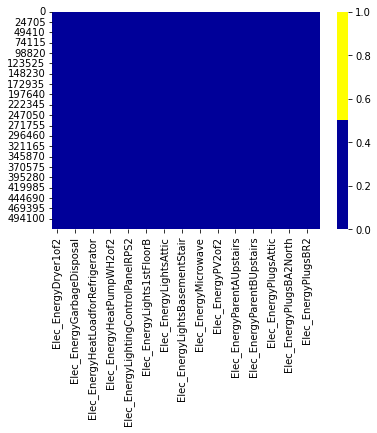

In [11]:

cols = netzero1.columns[50:80] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(netzero1[cols].isnull(), cmap=sns.color_palette(colours))

In [34]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
pct_missing = netzero1.loc[:, (netzero1.isnull().sum(0) > 0)].isnull().mean(0)*100
pct_missing[(pct_missing > 1)].round()

DHW_SHWGlycolTempIn                       5.0
DHW_WaterTempKSinkMix                    52.0
DHW_WaterTempMBAShwMix                   52.0
DHW_WaterTempMBATubMix                   52.0
PV_PVBacksideTemp7                       98.0
Vent_HRVfreshairpressuredifferential     70.0
Vent_HRVstaleairpressuredifferential     70.0
HVAC_DehumidifierAirflow                100.0
HVAC_DehumidifierExitAirTemp            100.0
HVAC_DehumidifierInletAirTemp           100.0
HVAC_DehumidifierPower                  100.0
dtype: float64

In [58]:
pct_missing_inverted = netzero1.loc[:, (netzero1.isnull().sum(0) > 0)].isnull().mean(0)*100
netzero1_no_nan = netzero1[pct_missing_inverted[(pct_missing <= 5)].index].dropna()


In [60]:
fig = px.imshow(netzero1_no_nan.corr(), color_continuous_scale='RdBu', color_continuous_midpoint=0)


In [66]:
fig.write_html("corr_heatmap.html")

SyntaxError: f-string expression part cannot include a backslash (1375870149.py, line 1)

{'_Database__config_path': 'C:\\Users\\Ronni\\Documents\\GitHub\\Datavidenskab-P6\\Config',
 '_Database__onedrive_path': 'C:\\Users\\Ronni\\OneDrive - Aalborg Universitet\\Datavidenskab P6',
 '_Database__data_path': 'C:\\Users\\Ronni\\OneDrive - Aalborg Universitet\\Datavidenskab P6\\data\\netzero-data',
 '_Database__model_path': 'C:\\Users\\Ronni\\Documents\\GitHub\\Datavidenskab-P6\\Project\\Models'}